In [33]:
import pandas as pd
import numpy as np

In [34]:
df = pd.read_csv('Advertisement.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


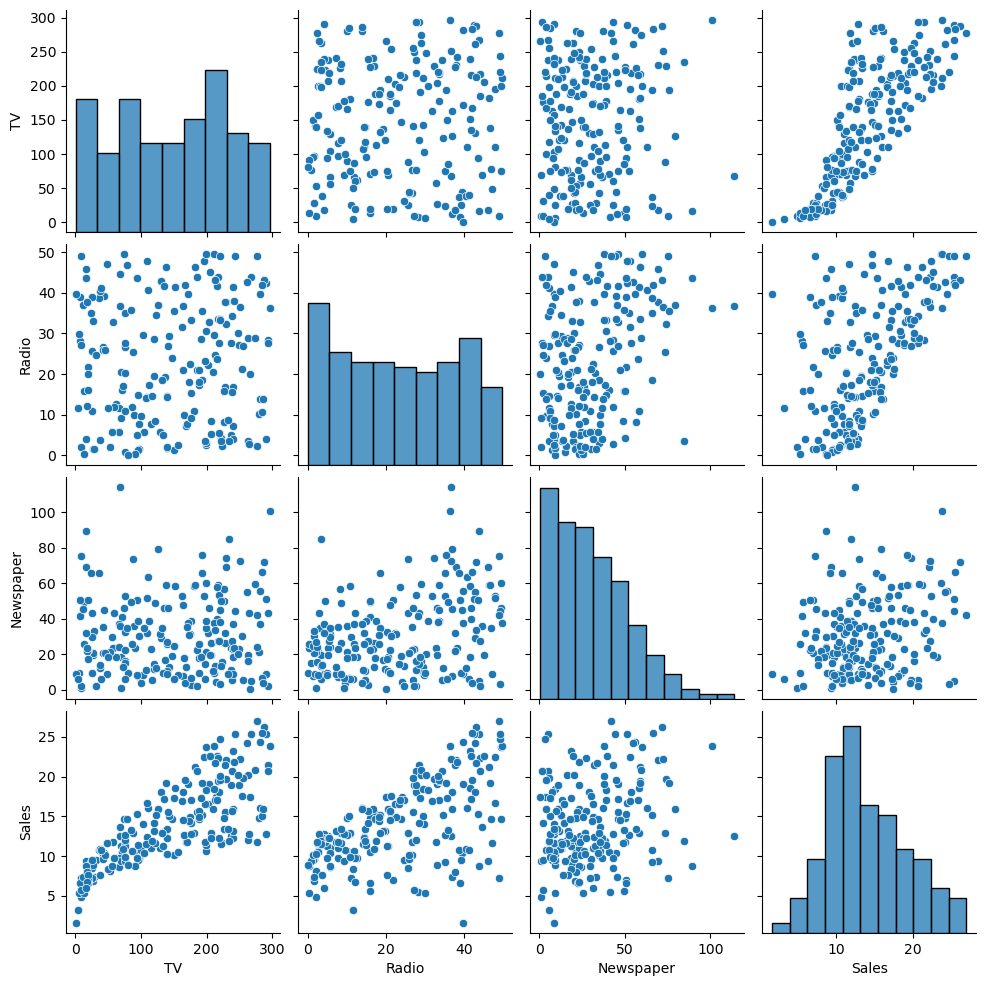

In [9]:
sns.pairplot(df,kind='scatter',diag_kind='auto')
plt.show()

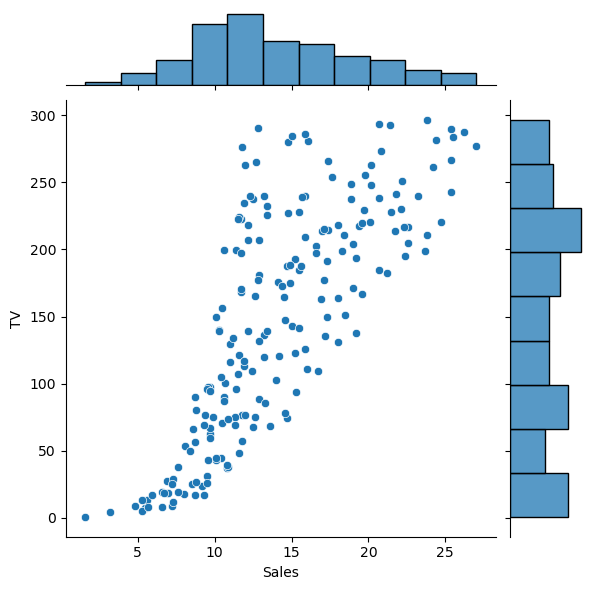

In [10]:
sns.jointplot(x=df['Sales'],y=df['TV'],kind='scatter')
plt.show()

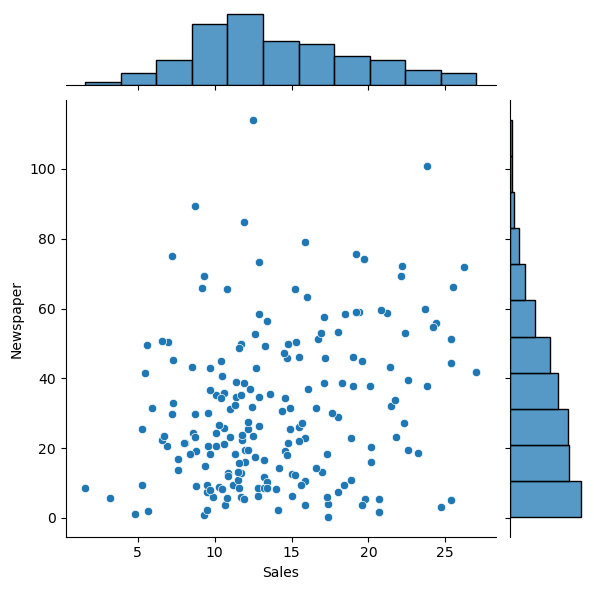

In [11]:
sns.jointplot(x=df['Sales'], y=df['Newspaper'], kind='scatter')
plt.show()


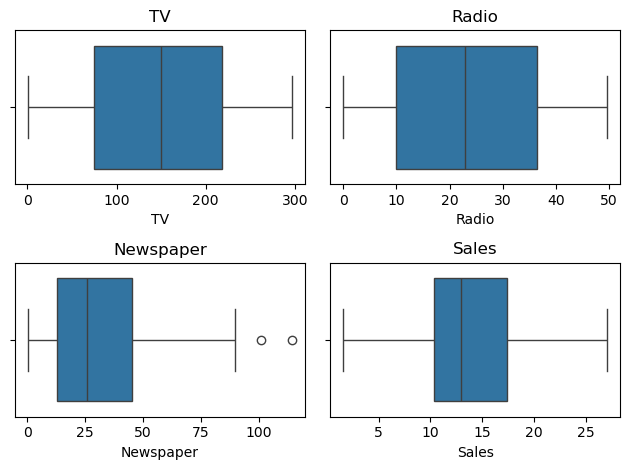

In [12]:
#boxplot

for col in df.select_dtypes(include = ['number']).columns:
    plt.subplot(2, 2, df.columns.get_loc(col) + 1)  # Adjust the subplot layout as needed
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

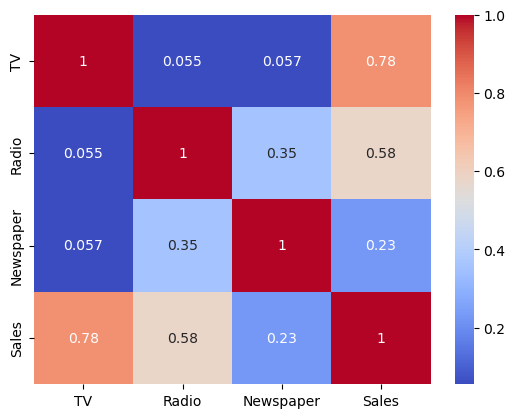

In [13]:
sns.heatmap(df.corr(),annot=True,cbar=True,cmap='coolwarm')
plt.show()

In [14]:
# getting top 10 largest

top_10_sales = df.nlargest(10,'Sales')
top_10_sales

,TV,Radio,Newspaper,Sales
175,276.9,48.9,41.8,27.0
183,287.6,43.0,71.8,26.2
198,283.6,42.0,66.2,25.5
36,266.9,43.8,5.0,25.4
98,289.7,42.3,51.2,25.4
147,243.2,49.0,44.3,25.4
128,220.3,49.0,3.2,24.7
17,281.4,39.6,55.8,24.4
61,261.3,42.7,54.7,24.2
58,210.8,49.6,37.7,23.8


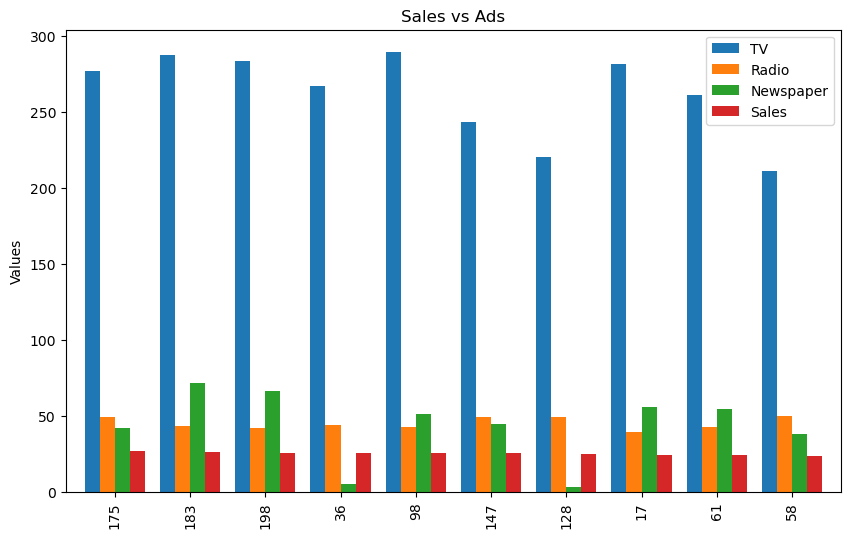

In [15]:
# grouped bar plot

ax = top_10_sales.plot(kind='bar', figsize=(10, 6), width=0.8)
ax.set_ylabel('Values')
plt.title('Sales vs Ads')

plt.show()

In [16]:
from sklearn.model_selection import train_test_split

In [51]:
# splitting the data for testing and training data 
#train_size=0.75: This means 75% of the data will go into train_df (the training set), and the remaining 
#25% will be assigned to validation_df (the validation set).

#random_state=1: This ensures that the split is reproducible—meaning,
#every time you run this code, the split will happen in the same way. If you remove random_state, the split will vary each time you run it.

x = df.drop(['Sales','Unnamed: 0'],axis=1)
y = df['Sales']



train_x ,test_x, train_y,test_y = train_test_split(x,y,train_size=0.75,random_state=1)

In [44]:
# Splitting dependent and independent variable



In [52]:
# Building the models

# Linear Regression model
from sklearn.linear_model import LinearRegression,Lasso,Ridge , ElasticNet

In [65]:
test_y.shape

(50,)

In [57]:
linear_regr = LinearRegression()
linear_regr.fit(train_x,train_y)  
linear_regr_train_y_predict = linear_regr.predict(train_x)
linear_regr_test_y_predict = linear_regr.predict(test_x)

In [71]:
from sklearn.metrics import root_mean_squared_error,r2_score

rmse_train = root_mean_squared_error(train_y,linear_regr_train_y_predict)
r2_train = r2_score(train_y,linear_regr_train_y_predict)
print('train: ','rmse_train:',rmse_train, ' ', 'r2_train:',r2_train)

rmse_test = root_mean_squared_error(test_y,linear_regr_test_y_predict)
r2_test = r2_score(test_y,linear_regr_test_y_predict)
print('test :','rmse_test:',rmse_test, ' ', 'r2_test:', r2_test)


# Here's how to interpret your training and test metrics:

# ### **1. RMSE (Root Mean Squared Error)**
# - **Train RMSE = 1.76** → This is the average error in predictions on training data.
# - **Test RMSE = 1.40** → Lower than training RMSE, suggesting good generalization.

# 🚀 **Lower RMSE values** mean the model makes more precise predictions.

# ---

# ### **2. R² (R-Squared Score)**
# - **Train R² = 0.89** → Model explains **89%** of the variance in training data.
# - **Test R² = 0.92** → Model performs even better on test data, explaining **92%** of variance.

# 🌟 **Higher R²** means the model effectively captures relationships in the data.

# ---

# ### **Interpretation:**
# - The model has **high accuracy**, as R² is close to 1.
# - Since **test RMSE < train RMSE**, there's no major overfitting—good generalization.
# - If test R² had been much lower than train R², it could indicate **overfitting**, but here it's balanced.

# Overall, your model seems well-tuned! 🎯 Would you like help with further improvements? 🚀


train:  rmse_train: 1.7569266765659672   r2_train: 0.890307557755665
test : rmse_test: 1.4046514230328955   r2_test: 0.9156213613792232


### 
You're implementing **Linear Regression** using the `LinearRegression()` class from `sklearn.linear_model`. Here's a breakdown of what each step does:

### Code Explanation:
1. **Initialize the Model**
   ```python
   linear_regr = LinearRegression()
   ```
   - This creates an instance of the `LinearRegression` model.

2. **Train the Model**
   ```python
   linear_regr.fit(train_x, train_y)
   ```
   - This fits the model using `train_x` (features) and `train_y` (target variable).
   - The model learns the relationships between independent variables and the dependent variable.

3. **Make Predictions on Training Data**
   ```python
   linear_regr_prediction_train = linear_regr.predict(train_x)
   ```
   - This predicts values for the **training dataset**.
   - This helps evaluate how well the model fits the training data.

4. **Make Predictions on Validation Data**
   ```python
   linear_regr_prediction_test = linear_regr.predict(validation_x)
   ```
   - This predicts values for the **validation dataset** (unseen data).
   - Helps check if the model generalizes well.

### Next Steps:
You can measure how well the model is performing using **evaluation metrics** like:
- **Mean Squared Error (MSE)**
- **Root Mean Squared Error (RMSE)**
- **R² Score (Coefficient of Determination)**



In [22]:
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error,mean_squared_error

In [23]:
print("Accuracy Scores for Linear Regression model on raw data without handling outlier using MSE")

lr_mse_train = mean_squared_error(train_y,linear_regr_prediction_train)
lr_mse_val = mean_squared_error(validation_y,linear_regr_prediction_test)

print('MSE for Training data :',lr_mse_train)
print('MSE for Validation data :',lr_mse_val)


Accuracy Scores for Linear Regression model on raw data without handling outlier using MSE
MSE for Training data : 3.0867913468291346
MSE for Validation data : 1.9730456202283384


### Mean Squared Error (**MSE**) is a metric used to measure how well a regression model predicts values. It's calculated by averaging the squared differences between actual and predicted values.

### Interpreting Your MSE Results:
- **MSE for Training Data (3.0868)**: This tells us how well the model performed on the data it was trained on. A lower value indicates that the predictions were close to the actual values.
- **MSE for Validation Data (1.9730)**: This tells us how well the model performs on unseen data (validation set). Again, a lower value means better predictions.

### Observations:
- Your **validation MSE (1.9730) is lower than the training MSE (3.0868)**. This could indicate that the model generalizes well to unseen data, which is a good sign.
- If the **training MSE was much lower than the validation MSE**, it could suggest **overfitting** (meaning the model memorized the training data but struggles on new data).
- If both values were **very high**, the model might not be learning properly (possibly underfitting).



In [24]:
print("Accuracy Scores for Linear Regression model on raw data without handling outlier")

lr_r2_train = r2_score(train_y,linear_regr_prediction_train)
lr_r2_val = r2_score(validation_y,linear_regr_prediction_test)

lr_root_mean_squared_error_train = root_mean_squared_error(train_y,linear_regr_prediction_train)
lr_root_mean_squared_error_val = root_mean_squared_error(validation_y,linear_regr_prediction_test)

print('R2 for Training data :',lr_r2_train)
print('R2 for Validation data :',lr_r2_val)
print("------------------------------------")
print('MSE for Training data :',lr_mse_train)
print('MSE for Validation data :',lr_mse_val)
print("------------------------------------")
print('RMSE for Training data :',lr_root_mean_squared_error_train)
print('RMSE for Validation data :',lr_root_mean_squared_error_val)

Accuracy Scores for Linear Regression model on raw data without handling outlier
R2 for Training data : 0.890307557755665
R2 for Validation data : 0.9156213613792232
------------------------------------
MSE for Training data : 3.0867913468291346
MSE for Validation data : 1.9730456202283384
------------------------------------
RMSE for Training data : 1.7569266765659672
RMSE for Validation data : 1.4046514230328955


In [25]:
laaso_lr = Lasso()
laaso_lr.fit(train_x,train_y)

Lasso()

In [26]:
laaso_prdict_lr_train = laaso_lr.predict(train_x)
laaso_predict_lr_validate = laaso_lr.predict(validation_x)

In [27]:
print("Accuracy Scores for LAsso Linear Regression model on raw data without handling outlier")
mse_laaso_train = mean_squared_error(train_y,laaso_prdict_lr_train)
mse_laaso_validate = mean_squared_error(validation_y,laaso_predict_lr_validate)

r2_laaso_train = r2_score(train_y,laaso_prdict_lr_train)
r2_laaso_validate = r2_score(validation_y,laaso_predict_lr_validate)

print('R2 for Training data laaso:',r2_laaso_train)
print('R2 for Validation data laaso :',r2_laaso_validate)
print("------------------------------------")
print('MSE for Training data laaso :',mse_laaso_train)
print('MSE for Validation data laaso :',mse_laaso_validate)

# print("------------------------------------")
# print('RMSE for Training data lasso :',lr_root_mean_squared_error_train)
# print('RMSE for Validation data lasso :',lr_root_mean_squared_error_val)

Accuracy Scores for LAsso Linear Regression model on raw data without handling outlier
R2 for Training data laaso: 0.8901342886277591
R2 for Validation data laaso : 0.9141407522971794
------------------------------------
MSE for Training data laaso : 3.0916672127844302
MSE for Validation data laaso : 2.0076670518175126


In [28]:


elastic_net_lr = ElasticNet()
elastic_net_lr.fit(train_x,train_y)

elastic_prdict_lr_train = elastic_net_lr.predict(train_x)
elastic_predict_lr_validate = elastic_net_lr.predict(validation_x)


In [32]:
intercept = elastic_net_lr.intercept_
coefficients = elastic_net_lr.coef_
print(intercept,coefficients)

2.9490039269519386 [0.04652035 0.17683867 0.00304459]


In [29]:
print("Accuracy Scores for Elastic_net Linear Regression model on raw data without handling outlier")
mse_elasatic_train = mean_squared_error(train_y,elastic_prdict_lr_train)
mse_elastic_validate = mean_squared_error(validation_y,elastic_predict_lr_validate)

r2_elastic_train = r2_score(train_y,elastic_prdict_lr_train)
r2_elastic_validate = r2_score(validation_y,elastic_predict_lr_validate)

print('R2 for Training data laaso:',r2_elastic_train)
print('R2 for Validation data laaso :',r2_elastic_validate)
print("------------------------------------")
print('MSE for Training data laaso :',mse_elasatic_train)
print('MSE for Validation data laaso :',mse_elastic_validate)

Accuracy Scores for Elastic_net Linear Regression model on raw data without handling outlier
R2 for Training data laaso: 0.8902510395505827
R2 for Validation data laaso : 0.9146231384451826
------------------------------------
MSE for Training data laaso : 3.088381792832675
MSE for Validation data laaso : 1.9963873026756207


In [30]:
print(train_y.tolist())

[25.4, 15.2, 6.6, 21.2, 17.4, 12.6, 12.2, 7.2, 13.4, 9.6, 12.2, 13.4, 5.3, 20.7, 24.4, 7.2, 8.8, 19.2, 14.8, 9.5, 20.2, 21.7, 26.2, 7.3, 8.0, 15.9, 9.2, 9.4, 22.2, 15.5, 15.6, 11.2, 12.3, 11.6, 9.9, 9.7, 11.3, 5.7, 17.3, 14.9, 17.2, 25.4, 13.3, 10.3, 19.0, 14.7, 7.6, 12.8, 10.9, 11.7, 8.7, 12.5, 7.3, 16.6, 9.3, 18.3, 15.2, 16.1, 11.8, 14.1, 22.1, 3.2, 14.2, 9.3, 23.7, 12.2, 12.9, 1.6, 10.6, 15.7, 17.0, 19.4, 25.4, 14.4, 10.4, 16.0, 10.5, 10.3, 11.9, 8.6, 9.6, 13.6, 8.7, 11.7, 10.6, 15.5, 6.6, 10.6, 8.4, 20.7, 11.6, 11.6, 21.8, 15.9, 18.0, 22.4, 17.1, 18.0, 19.8, 11.8, 22.6, 15.0, 6.9, 12.9, 9.7, 18.5, 15.0, 9.7, 10.1, 12.7, 10.8, 21.4, 7.0, 12.6, 27.0, 4.8, 8.1, 24.7, 10.4, 13.2, 5.6, 24.2, 14.0, 13.2, 9.7, 19.2, 12.0, 11.7, 18.9, 11.4, 20.1, 10.1, 15.3, 20.7, 13.2, 23.8, 18.0, 11.8, 12.0, 10.8, 12.4, 9.7, 11.4, 5.9, 11.0, 19.6, 20.8, 8.8, 10.9, 14.7]


In [31]:
linear_regr_prediction_train

array([24.12177431, 14.85072173,  6.72379456, 19.85930425, 18.82871344,
       12.44036847, 14.1133213 ,  6.11429897, 15.25538172,  9.59017294,
       12.00904752, 11.99639844,  8.51767752, 21.51721458, 23.2674336 ,
       12.3016954 ,  6.64318924, 17.81473483, 16.45931297,  8.75863135,
       20.32409492, 20.63892684, 24.22047897, 10.18866779, 10.52134783,
       16.36447734, 10.50103906,  6.62889298, 21.34875677, 14.41738921,
       15.43480827, 10.04055221, 14.90502045, 13.79123657,  8.34820201,
        8.80345707, 10.13232857,  8.1484559 , 16.98009212, 15.17016985,
       16.80176624, 23.16942787, 13.45151878,  9.84073826, 18.09613708,
       14.76973195,  5.36623458, 12.80714865, 11.90755307, 12.03462847,
       11.80158932, 14.92618738,  4.59131578, 16.30150609, 12.14035221,
       17.76374362, 15.39644612, 18.56560592, 11.51190161, 13.8256774 ,
       20.60242288,  5.16578322, 13.64300014,  7.75919776, 21.1960983 ,
       13.50508051, 11.8104142 , 10.03424251,  8.95065536, 16.89